<a href="https://colab.research.google.com/github/loguko/art/blob/main/%D0%AD%D0%AD%D0%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install mne PyWavelets matplotlib numpy




  Using cached mne-1.8.0-py3-none-any.whl.metadata (21 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.0 MB/s eta 0:00:00


In [14]:
import mne
import pywt
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def wavelet_transform(data, wavelet='cmor', scales=np.arange(1, 128)):
    coeffs, frequencies = pywt.cwt(data, scales, wavelet)
    return coeffs, frequencies

In [17]:
# Загрузка данных ЭЭГ из файлов формата EDF
# Замените 'rest.edf' и 'post_exercise.edf' на ваши файлы
rest_data = mne.io.read_raw_edf('/content/Subject00_1.edf', preload=True)
post_exercise_data = mne.io.read_raw_edf('/content/Subject00_2.edf', preload=True)

Extracting EDF parameters from /content/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /content/Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


In [25]:
#Фильтрация данных для удаления ненужных частот
rest_data.filter(l_freq=1.0, h_freq=40.0)
post_exercise_data.filter(l_freq=1.0, h_freq=40.0)

# Выбор канала для анализа, например, 'Cz'
channel = 'Fp1'

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [26]:
all_channels = rest_data.ch_names

In [27]:
print("Доступные каналы:")
for i, channel in enumerate(all_channels):
    print(f"{i}: {channel}")

Доступные каналы:
0: EEG Fp1
1: EEG Fp2
2: EEG F3
3: EEG F4
4: EEG F7
5: EEG F8
6: EEG T3
7: EEG T4
8: EEG C3
9: EEG C4
10: EEG T5
11: EEG T6
12: EEG P3
13: EEG P4
14: EEG O1
15: EEG O2
16: EEG Fz
17: EEG Cz
18: EEG Pz
19: EEG A2-A1
20: ECG ECG


In [24]:
# Получение данных для выбранного канала
rest_channel_data = rest_data.get_data(picks=channel).flatten()
post_exercise_channel_data = post_exercise_data.get_data(picks=channel).flatten()

In [28]:
# Вейвлет-преобразование
scales = np.arange(1, 128)  # Определение масштабов
rest_coeffs, rest_frequencies = wavelet_transform(rest_channel_data)
post_exercise_coeffs, post_exercise_frequencies = wavelet_transform(post_exercise_channel_data)

/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


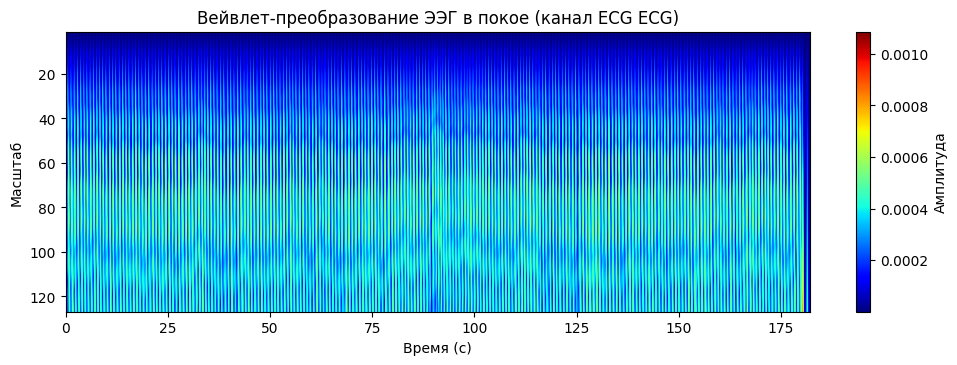

In [29]:
plt.figure(figsize=(12, 8))

# График для ЭЭГ в покое
plt.subplot(2, 1, 1)
plt.imshow(np.abs(rest_coeffs), aspect='auto', extent=[0, rest_channel_data.size / rest_data.info['sfreq'],
                scales[-1], scales[0]], cmap='jet')
plt.title('Вейвлет-преобразование ЭЭГ в покое (канал {})'.format(channel))
plt.ylabel('Масштаб')
plt.xlabel('Время (с)')
plt.colorbar(label='Амплитуда')

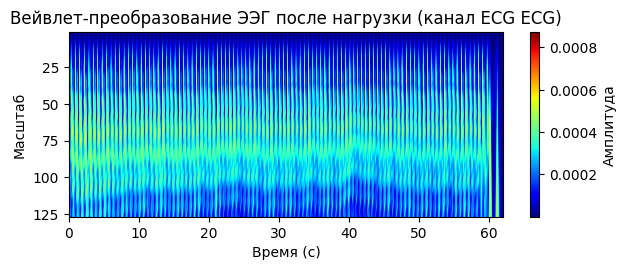

In [30]:
# График для ЭЭГ после нагрузки
plt.subplot(2, 1, 2)
plt.imshow(np.abs(post_exercise_coeffs), aspect='auto', extent=[0, post_exercise_channel_data.size / post_exercise_data.info['sfreq'],
                scales[-1], scales[0]], cmap='jet')
plt.title('Вейвлет-преобразование ЭЭГ после нагрузки (канал {})'.format(channel))
plt.ylabel('Масштаб')
plt.xlabel('Время (с)')
plt.colorbar(label='Амплитуда')

plt.tight_layout()
plt.show()